# 이동평균선

### 이동평균선이란?
- 주가의 평균적인 움직임을 조사한 선



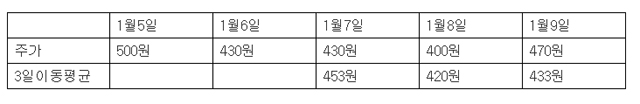

예를 들어 위와 같은 표에서 3일 이동평균선을 그린다면 5일,6일,7일의 평균값인 453원부터 3일씩 평균을 이뤄가며 그래프를 그린다는 것이다.

In [2]:
import pandas as pd
import yfinance as yf

In [ ]:
# def download_stock_data(symbol,start,end):# 주식 코드 형식은 "005930.KS", 날짜 형식은 "2022-02-01"
#     data = yf.download(symbol,start,end)
#     return data

# def remove_weekend(data):
#     return data[data['Volume'] != 0]

In [ ]:
# def moving_average(data,date):
#     return data['Adj Close'].rolling(window=5).mean()

# def show_chart():
    

# ma5 = samsung['Adj Close'].rolling(window=5).mean()

# # MA5라는 열 추가
# new_samsung.insert(len(new_samsung.columns),"MA5",ma5)



In [55]:
start = "2020-02-01"
end = "2023-03-01"

symbol = "005930.KS"

In [56]:
samsung = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [57]:
print(samsung)

               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2020-02-03  55500.0  57400.0  55200.0  57200.0  52109.121094  23995260
2020-02-04  57100.0  59000.0  56800.0  58900.0  53657.816406  21800192
2020-02-05  60000.0  60200.0  58900.0  59500.0  54204.406250  19278165
2020-02-06  60100.0  61100.0  59700.0  61100.0  55662.011719  14727159
2020-02-07  61100.0  61200.0  59700.0  60400.0  55024.304688  16402493
...             ...      ...      ...      ...           ...       ...
2023-02-22  61500.0  61800.0  61000.0  61100.0  60748.210938     39178
2023-02-23  61700.0  62500.0  61500.0  62000.0  61643.031250     37145
2023-02-24  62300.0  62600.0  61300.0  61300.0  60947.062500     50792
2023-02-27  60800.0  60800.0  60200.0  60500.0  60151.667969  11155697
2023-02-28  60800.0  61400.0  60500.0  60600.0  60251.089844  13715861

[760 rows x 6 columns]


In [58]:
import matplotlib.pyplot as plt

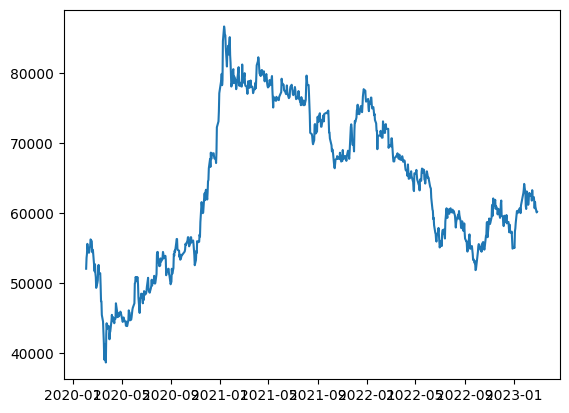

In [59]:
plt.plot(samsung['Adj Close'])
plt.show()

In [60]:
# 휴장일 제거
new_samsung = samsung[samsung['Volume'] != 0]

new_samsung['Close'].head(10)



Date
2020-02-03    57200.0
2020-02-04    58900.0
2020-02-05    59500.0
2020-02-06    61100.0
2020-02-07    60400.0
2020-02-10    59700.0
2020-02-11    59900.0
2020-02-12    60500.0
2020-02-13    60700.0
2020-02-14    61800.0
Name: Close, dtype: float64

In [61]:
# 이동평균선 : 일정 기간 동안의 주가를 산술 평균한 값인 주가이동평균을 차례로 연결해 만든 선
ma5 = samsung['Adj Close'].rolling(window=5).mean()

# MA5라는 열 추가
new_samsung.insert(len(new_samsung.columns),"MA5",ma5)

new_samsung.tail(10)
# ma20
ma20 = samsung['Adj Close'].rolling(window=20).mean()
new_samsung.insert(len(new_samsung.columns),"MA20",ma20)

ma60 = samsung['Adj Close'].rolling(window=60).mean()
new_samsung.insert(len(new_samsung.columns),"MA60",ma60)

ma120 = samsung['Adj Close'].rolling(window=120).mean()
new_samsung.insert(len(new_samsung.columns),"MA120",ma120)

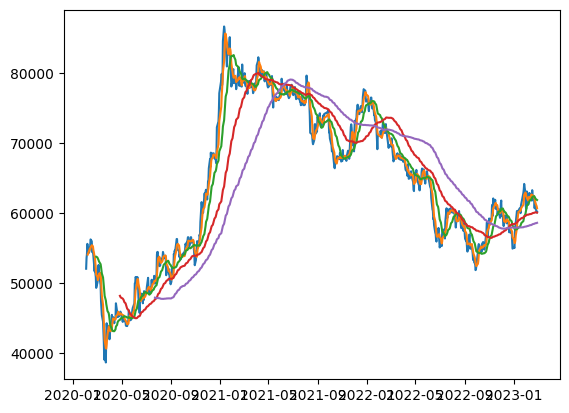

In [62]:
plt.plot(new_samsung.index,new_samsung['Adj Close'],label='Close')
plt.plot(new_samsung.index,new_samsung['MA5'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA20'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA60'],label='Adj Close')
plt.plot(new_samsung.index,new_samsung['MA120'],label='Adj Close')


In [63]:
ma5 = new_samsung['Close'].rolling(window=5).mean().head(10)
ma5

Date
2020-02-03        NaN
2020-02-04        NaN
2020-02-05        NaN
2020-02-06        NaN
2020-02-07    59420.0
2020-02-10    59920.0
2020-02-11    60120.0
2020-02-12    60320.0
2020-02-13    60240.0
2020-02-14    60520.0
Name: Close, dtype: float64

## 골든 크로스
- 단기 이동 평균선이 장기 이동 평균선을 뚫고 상승하는 경우
- 주로 주가의 상승을 예측

## 데드 크로스
- 단기 이동 평균선이 장기 이동 평균성을 뚫고 하락하는 경우
- 주로 주가의 하락을 예측

In [66]:
# 골든 크로스 날짜 찾기 
def golden_cross(short,long):
    result = []
    for i in range(1,len(short)):
        if(short.iloc[i]>= long.iloc[i] ) and (short.iloc[i-1] < long.iloc[i]):
            result.append(short.index[i])
    return result

def dead_cross(short,long):
    result = []
    for i in range(1,len(short)):
        if(short.iloc[i]<= long.iloc[i] ) and (short.iloc[i-1] > long.iloc[i]):
            result.append(short.index[i])
    return result

In [67]:
golden = golden_cross(ma20,ma60)
dead = dead_cross(ma20,ma60)

print("골든 크로스 날짜: ",golden)
print("데드 크로스 날짜: ",dead)


골든 크로스 날짜:  [Timestamp('2021-04-16 00:00:00'), Timestamp('2021-12-06 00:00:00'), Timestamp('2022-11-03 00:00:00'), Timestamp('2023-01-30 00:00:00')]
데드 크로스 날짜:  [Timestamp('2021-03-17 00:00:00'), Timestamp('2021-05-13 00:00:00'), Timestamp('2022-02-09 00:00:00'), Timestamp('2022-09-06 00:00:00'), Timestamp('2022-12-29 00:00:00')]
